# ΕΡΓΑΣΙΑ 2 ΑΝΑΓΝΩΡΙΣΗ ΠΡΟΤΥΠΩΝ
## ΚΩΝΣΤΑΝΤΙΝΟΣ ΡΟΥΜΟΓΛΟΥ 58163
---

# ΑΣΚΗΣΗ 1
---
---
<br/>


* Α. <br/>
---
Σε αυτό το ερώτημα ζητείται να γράψουμε κατάλληλο κώδικα ώστε να εκτιμήσουμε τις πυκνότητες πιθανότητας με τη μέθοδο Parzen για τις τρεις κλάσεις $ω_1,ω_2,ω_3$ με τη βοήθεια της ακόλουθης συνάρτησης παραθύρου :<br/>
 - $$ φ(x-x_i)=\frac{1}{h_Ν \sqrt{2π}}e^{- \frac{||x-x_i||_2^2}{2h_Ν^2}} \ (1) $$
Η βάση της μεθόδου είναι η επιλογή μιας συνάρτησης παραθύρου,συνήθως gaussian (1), και καθορίζει πως τα δεδομένα συνεισφέρουν στην εκτίμηση της pdf.Η μέθοδος είναι μη παραμετρική και η κύρια παραμετροποίηση της είναι το παράθυρο πλάτους $h_Ν$ το οποίο καθορίζει πως θα εκτιμηθεί η pdf.Έτσι αυτή υπολογίζεται από τον ακόλουθο τύπο:
 - $$ p_n(x)=\frac{1}{n}\sum_{i=1}^{n}\frac{1}{V_n}φ(x-x_i) \ (2) $$
   , όπου $V_n=(h_Ν)^d,d=$ διάσταση προβλήματος.<br/>

 - Πιο αναλυτικά ανοίγουμε το .txt αρχείο ,βάζουμε ετικέτες και το τροποποιούμε σε πίνακα.
 - Στη συνέχεια δημιουργούμε την συνάρτηση παραθύρου "parzen.window" η οποία λαμβάνει ως ορίσματα τις τιμές του x όπου θέλουμε να εκτιμήσουμε τις pdf,οι οποίες είναι 2 διαστάσεων , τα samples από το dataset μας και τέλος την παράμετρο $h_N$ και υπολογίζει το ζητούμενο με βάση τις σχέσεις (1) και (2).
 - Πρέπει να βρούμε για ποιές τιμές του x θα εκτιμήσουμε τις pdf's.
 - Έτσι παίρνουμε τις μέγιστες και τις ελάχιστες τιμές των χαρακτηριστικών $x_1,x_2$ και δημιουργούμε 2 διαστήματα τιμών με τη βοήθεια της συνάρτησης "np.linspace" και τα ενώνουμε για να δημιουργήσουμε έναν πίνακα 2 διαστάσεων με τη συνάρτηση "np.c",αφού έχουμε ήδη δημιουργήσει το "grid" των χαρακτηριστικών ,το οποίο χρησιμεύει για την οπτικοποίηση των δεδομένων.
 - Τέλος με μία λούπα καλούμε τη συνάρτηση για κάθε μία γραμμή του πίνακα grid.Η διαδικασία επαναλαμβάνεται 3 φορές για κάθε μία κλάση.

In [3]:
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
#python code to mount drive ,load new_data.txt file and connvert it to np.array with labels(x1,x2,class_label)
drive_path = 'HW_2/data.txt'
data = []
with open(drive_path, "r") as file:
    for line in file:
        x1, x2, class_label = map(float, line.strip().split(","))
        data.append((x1, x2, class_label))

data = np.array(data)

photo_path='/content/drive/My Drive/PATTERNREC/SVM.png'
onevsone='/content/drive/My Drive/PATTERNREC/onevsone.png'
k_fold='/content/drive/My Drive/PATTERNREC/k-fold val.png'
conf_matrix='/content/drive/My Drive/PATTERNREC/conf_matrix.png'


FileNotFoundError: [Errno 2] No such file or directory: 'HW_2/data.txt'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# create parzen window function
def parzen_window(x, data, hN):
    diff=np.sum((data-x)**2,axis=1)
    term_1=1/(hN**3*np.sqrt(2*np.pi))
    kernel = term_1 * np.exp(-diff / (2 * hN**2))
    final=np.sum(kernel)/len(data)
    return(final)


# class_1 = data[data[:, 2] == 1][:, :2]  # Extract features for class 1
# class_2=  data[data[:, 2] == 2][:, :2]  # Extract features for class 2
# class_3 = data[data[:, 2] == 3][:, :2]  # Extract features for class 3


def my_f(h,data):


    class_1 = data[data[:, 2] == 1][:, :2]  # Extract features for class 1
    class_2=  data[data[:, 2] == 2][:, :2]  # Extract features for class 2
    class_3 = data[data[:, 2] == 3][:, :2]  # Extract features for class 3


    x_1 = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
    x_2 = np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100)

    # Create a grid of points for visualization
    x, y = np.meshgrid(x_1, x_2)
    grid = np.c_[x.ravel(), y.ravel()]

    # Estimate and plot the PDF for each class
    classes = [class_1, class_2, class_3]
    class_colors = ["blue", "red", "green"]
    class_labels = ['Class 1', 'Class 2', 'Class 3']
    artists = []
    colors = ['blue', 'red', 'green']
    alpha_values=[0.5,0.5,0.5]
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    # cmap = plt.get_cmap('tab10')



    for i, (class_data, label) in enumerate(zip([class_1, class_2, class_3], class_labels)):
        pdf = np.array([parzen_window(point, class_data, h) for point in grid])
        pdf = pdf.reshape(x.shape)

        # ax.plot_surface(x, y, pdf,color=class_colors[i], label=label, alpha=alpha_values[i],zorder=i)
        ax.plot_surface(x, y, pdf,cmap="viridis", label=label, alpha=alpha_values[i],zorder=i)


        representative_point = class_data.mean(axis=0)

    # Add text labels at representative points for each class
        ax.text(representative_point[0], representative_point[1], np.max(pdf),
            f'{label}', color=class_colors[i], fontsize=10)

    ax.set_title(f"PDFs for Classes with hN={h}")
    ax.set_xlabel('Feature 1 (x1)')
    ax.set_ylabel('Feature 2 (x2)')
    ax.set_zlabel('PDF')
    # ax.legend()

    plt.show()
    # return fig,ax


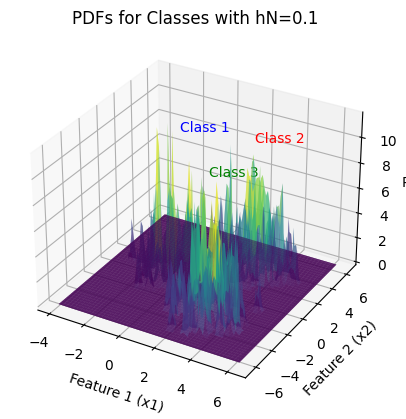

In [ ]:
# @title PDF for h=0.1
my_f(0.1,data)

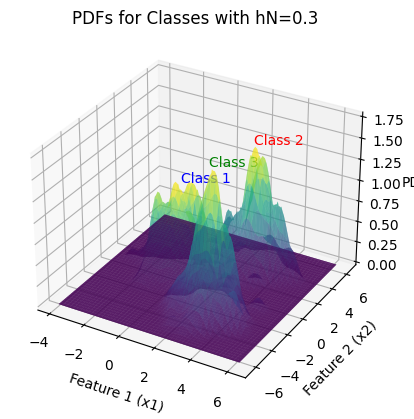

In [ ]:
# @title PDF for h=0.3
my_f(0.3,data)

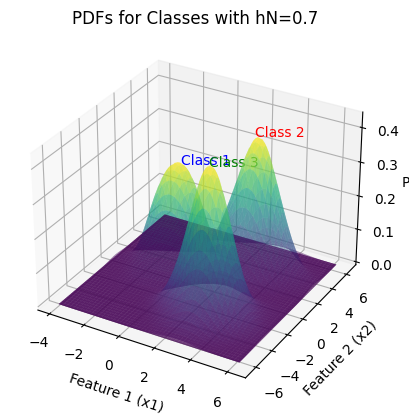

In [ ]:
# @title PDF for h=0.7
my_f(0.7,data)

  * Καταλαβαίνουμε πως όσο αυξάνεται το $h_N$ τόσο καλύτερα αποτελέσματα παίρνουμε.Πιο αναλυτικά:<br/>
   - $h_N=0.1$(μικρό παράθυρο)
     - Μικρό και στενό παράθυρο το οποίο φέρνει πυκνότητα πιθανότητας "σφυρηλατημένη" με ανομοιότητες και ασυνέπειες αλλά με μεγάλο μέτρο.Υπάρχει υψηλός κίνδυνος υπερ-προσαρμογής.
   - $h_N=0.3$(μέτριο παράθυρο)
     - Καλύτερα αποτελέσματα ,διατηρείται μια ισορροπία και η ευαισθησία μειώνεται.Οι περιοχές απόφασης είναι πιο σταθερές και ευρύτερες.
   - $h_N=0.7$(μεγάλο παράθυρο)
     - Αρκετά ευρύ παράθυρο με την πυκνότητα να είναι ακόμα λιγότερο ευαίσθητη στις τοπικές πληροφορίες.Οι περιοχές απόφασης είναι πολύ σταθερές και γενικές αλλά υπάρχει υψηλός κίνδυνος υπο-προσαρμογής.
  
  * Αν είχαμε στη διάθεση μας μόνο το $25\%$ των δεδομένων θα έπρεπε να τροποποιήσουμε  το $h_N$ για να διατηρήσουμε παρόμοια λεπτομέρεια.Το καινούριο μέγεθος παραθύρου θα δίνεται από την παρακάτω σχέση:
  - 
   $$ \begin{cases}
   V_n=\frac{V_1}{\sqrt{n}} \\
   V_n^{'}=\frac{V_1}{\sqrt{0.25n}}
    \end{cases}
    \Rightarrow
    \frac{V_n}{V_n^{'}}=\sqrt{0.25}\Rightarrow V_n^{'}=\frac{V_n}{2} \ (1)
   $$

  - $  (1)\Rightarrow h_N{'}^{3}=\frac{h_N^3}{2}\Rightarrow h_N^{'}=\sqrt[3]{0.0135}\Rightarrow \boxed{h_N^{'}=0.2341}$

In [ ]:
def adjust_bandwidth(h1, n1, n2, d=2):

    h2 = h1 * (n2 / n1)**(-1 / (d + 4))
    return h2

# Initial bandwidth and sample size
h1 = 0.3
n1 = data.shape[0]

# New sample size
n2 = 75 # 0.25*300

# Adjust the bandwidth for the new sample size
h2 = adjust_bandwidth(h1, n1, n2)

print("Initial bandwidth (h1):", h1)
print(f"Adjusted bandwidth for {n2} samples (h2):", h2)

Initial bandwidth (h1): 0.3
Adjusted bandwidth for 75 samples (h2): 0.37797631496846196


- Έτσι πρέπει να  το επιβεβαιώσουμε πειραματικά. Τροποποιούμε το dataset κρατώντας μόνο το $25\%$ των δεδομένων μας και παίρνουμε το εξής αποτέλεσμα.Ο τρόπος που μειώνουμε τα δεδομένα δεν είναι τελείως τυχαίος,καθώς μειώνουμε την ίδια ποσότητα δεδομένων από κάθε κλάση για να έχουμε υψηλό αίσθημα δικαιοσύνης.

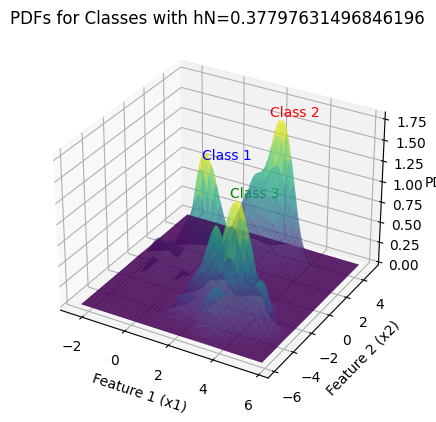

In [ ]:
import numpy as np


# Separate the data into classes
class_1 = data[data[:, 2] == 1]
class_2 = data[data[:, 2] == 2]
class_3 = data[data[:, 2] == 3]

# Calculate the number of samples to keep from each class (25%)
num_samples_to_keep = int(0.25 * min(len(class_1), len(class_2), len(class_3)))

# Randomly select samples from each class
class_1_indices = np.random.choice(len(class_1), size=num_samples_to_keep, replace=False)
class_2_indices = np.random.choice(len(class_2), size=num_samples_to_keep, replace=False)
class_3_indices = np.random.choice(len(class_3), size=num_samples_to_keep, replace=False)

# Extract the selected samples from each class
class_1_data_reduced = class_1[class_1_indices]
class_2_data_reduced = class_2[class_2_indices]
class_3_data_reduced = class_3[class_3_indices]

# Concatenate the reduced data from each class
reduced_data = np.vstack([class_1_data_reduced, class_2_data_reduced, class_3_data_reduced])
variance = np.var(reduced_data)


my_f(h2,reduced_data)



* B.<br/>
---
Σε αυτό το ερώτημα μας ζητείται να γράψουμε κατάλληλο κώδικα ώστε να εκτιμήσουμε τις πυκνότητες πιθανότητας των 3 κλάσσεων με τη βοήθεια του αλγορίθμου k-nn με $k= {3,10,30}$ και να τις απεικονίσουμε σε κοινό γράφημα.Πιο αναλυτικά γνωρίζοντας τα δεδομένα μας από μία άγνωστη pdf,θέλουμε να εκτιμήσουμε την τιμή της $p(x)$ για ένα άγνωστο x(ή στη συνέχεια για ένα διάστημα).Έτσι ο αλγόριθμος παρουσιάζεται παρακάτω :<br/>
 - ### **Κ-NN algorithm:**
   - 1. Επιλέγουμε το $k$ και τη συνάρτηση μέτρου που θα χρησιμοποιήσουμε(εδώ ευκλείδεια).
   - 2. Βρίσκουμε την απόσταση $x$ από όλα τα δεδομένα.
   - 3. Βρίσκουμε τα πλησιέστερα $k$ δεδομένα στο $x$
   - 4. Υπολογίζουμε τον όγκο $V(x)$ που περικλείει τα $k$ σημεία  
   -  5. Προσσεγίζουμε την pdf στο $x$ με $p(x)=\frac{k}{NV(x)}\ (1) $<br/>

   Εάν έχουμε επιλέξει την Ευκλείδεια απόσταση στο d-διαστατο χώρο και η απόσταση από το μακρινότερο
δείγμα είναι ρ τότε :

     - $V(x)=2ρ$ , για $d=1$.
     - $V(x)=πρ^2$, για $d=2 \ (2) $.<br/>

 - Ο κώδικας μας περιέχει μια συνάρτηση "euclidean_distance", η οποία είναι απλή και επιστρέφει την ευκλείδεια απόσταση δύο σημείων.
 - Στη συνέχεια δημιουργούμε τη συνάρτηση "k_nearest_neighbors" η οποία παίρνει ως όρισμα το dataset μας , ένα σημείο $x$ στο οποίο θέλουμε να υλοποιήσουμε τον αλγόριθμο και το $k$.
 - Πιο αναλυτικά διατρέχει σε όλα τα στοιχεία  του dataset και υπολογίζει την ευκλείδεια απόσταση για κάθε ένα ζευγάρι στοιχείων $(x_1,x_2)$ με το σημείο $x$.Ανάλογα με το $k$ που έχουμε εισάγει επιστρέφει τους πιο κοντινούς $k$ γείτονες αλλά και την απόσταση από το μακρινότερο δείγμα (που είναι γείτονας).
 - Έπειτα δημιουργούμε και πάλι δύο διαστήματα τιμών για το $x_1,x_2$ και τα ενώνουμε σε μία 2-d.
 - Τέλος καλόυμε τη συνάρτηση "k_nearest_neighbors"για κάθε ένα σημείο του διαστήματος που δημιουργήσαμε,υπολογίζουμε τον όγκο από τη σχέση (2) και τέλος την $p(x)$ από τη σχέση (1). Η παραπάνω διαδικασία επαναλμβάνεται 3 φορές,μία για κάθε κλάση.Οι πυκνότητες πιθανότητας για κάθε κλάση παρουσιάζονται σε κοινό διάγραμμα.

 - Δοκιμάζω να κάνω εκτίμηση για $k=3,8$ και $30$.Τα αποτελέσματα παρουσιάζονται παρακάτω.


In [ ]:
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum((x1-x2)**2))
    return(distance)
#
#
def k_nearest_neighbors(data,x,k):
    distances=[]
    for y in data:
        dist=euclidean_distance(x,y)
        distances.append((y,dist))
    distances.sort(key=lambda y: y[1])
    neighbors = [y[0] for y in distances[:k]]
    further_distance=distances[k-1][1]
    return neighbors,further_distance


def estimate_pdf(data, x_values, k, label):
    pdf_values = np.zeros(len(x_values))
    filtered_data = data[data[:, 2] == label][:, :2]

    for i, x in enumerate(x_values):
        query_point = np.array([x])
        distances = k_nearest_neighbors(filtered_data, query_point, k)[1]
        v_x = np.pi * distances**2
        pdf = k / (len(filtered_data) * v_x)
        pdf_values[i] = pdf

    return pdf_values.reshape(xx.shape)


x_1 = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100)
x_2 = np.linspace(data[: ,1].min() - 1 ,data[:,1].max() +  1 ,100)
xx, yy = np.meshgrid(x_1,x_2)
x_values = np.c_[xx.ravel(), yy.ravel()]


def plot_knn(k):
    fig=plt.figure()
    ax=fig.add_subplot(111, projection='3d')

    class_colors=["blue","red","green"]
    class_labels=["class_1","class_2","class_3"]
    a=0.5

    for i,label in enumerate([1, 2, 3]):
         pdf_values = estimate_pdf(data, x_values, k, label)

         ax.plot_surface(xx, yy, pdf_values,alpha=a,label=f"Class {label}",cmap="viridis")
         representative_point = data[data[:, 2] == label][:, :2].mean(axis=0)
         ax.text(representative_point[0], representative_point[1], np.max(pdf_values), class_labels[i],
                color=class_colors[i], fontsize=10, ha='center')



    ax.set_xlabel('Feature 1 (x1)')
    ax.set_ylabel('Feature 2 (x2)')
    ax.set_zlabel('PDF')


    plt.show()


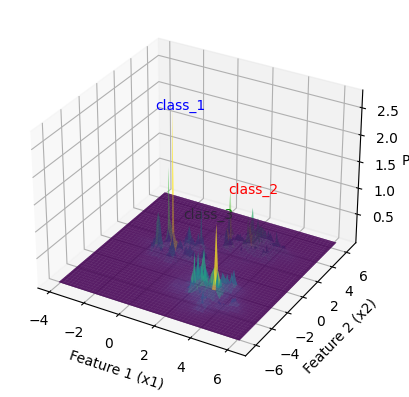

In [ ]:
# @title PDF for k=3
plot_knn(3)

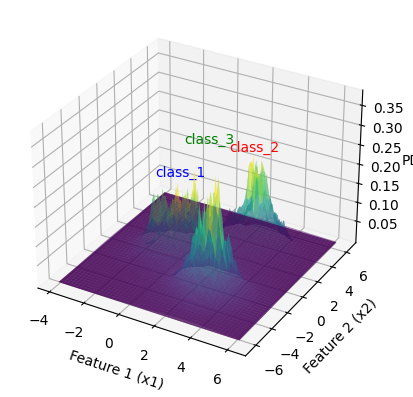

In [ ]:
# @title PDF for k=10
plot_knn(10)

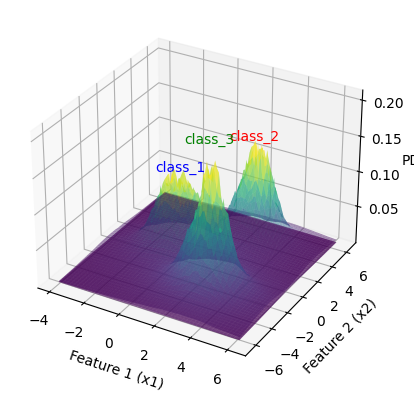

In [ ]:
# @title PDF for k=30
plot_knn(30)

* Γ.
---

   - Αφού εκτιμήσσαμε τις κατανομές με τη συνάρτηση παραθύρου parzen(Α.) μας ζητείται να ταξινομήσουμε τα δεδομένα με τον κανόνα απόφασης Bayes,θεωρώντας ότι οι  κλάσεις έχουν ίδιες a priori πιθανότητες,και να απεικονίσουμε τα δεδομένα και τις περιοχές απόφασης.
   - Έτσι ο κώδικας παραμένει ίδιος αναφορικά με το κομμάτι της συνάρτησης parzen και της εκτίμησης της pdf.Όμως στη συνέχεια χρησιμοποιούμε τη συνάρτηση "np.argmax" για να βρούμε ποια από τις 3 pdf(κλάσεις) σε κάθε ένα δυσδιάστατο σημείο του διαστήματος μας είναι μεγαλύτερη-"υπερισχύει"- και έτσι  αυτό   λέμε  ότι  αυτό το σημείο ανήκει στην συνάρτηση πιθανότητας με τη μεγαλύτερη τιμή.
   - Συνεχίζουμε τη διαδικασία για όλα τα σημεία του διαστήματος και μαρκάρουμε κάθε σημείο με ένα χρώμα για κάθε pdf.Έτσι δημιουργούνται κάποιες περιοχές για κάθε κλάση-συνάρτηση πυκνότητας πιθανότητας, ή αλλιώς περιοχές απόφασης.Επίσης παρουσιάζονται και τα στοιχεία κάθε κλάσης με διαφορετικό σχήμα.Πιο αναλυτικά η μεθοδολογία φαίνεται στον παρακάτω κώδικα, και τα αποτελέσματα παρουσιάζονται στο figure 1.

<Figure size 640x480 with 0 Axes>

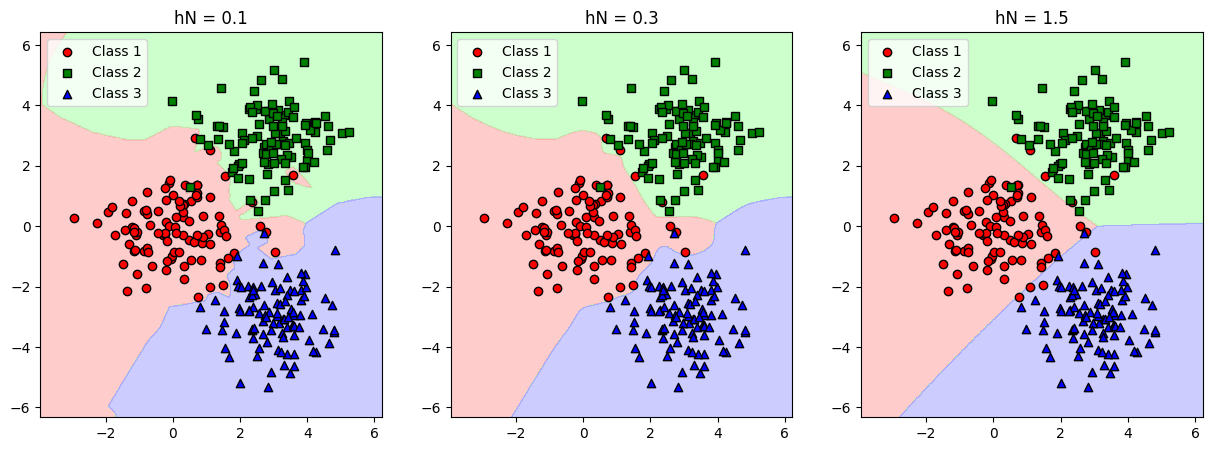

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm

def decision_parzen():
  # again the same steps
  class_1 = data[data[:, 2] == 1][:, :2]
  class_2 = data[data[:, 2] == 2][:, :2]
  class_3 = data[data[:, 2] == 3][:, :2]

  h_values = [0.1, 0.3, 1.5]

  x_1 = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 500)
  x_2 = np.linspace(data[: ,1].min() - 1 ,data[:,1].max() +  1 ,500)
  x, y = np.meshgrid(x_1,x_2)
  grid = np.c_[x.ravel(), y.ravel()]

  # colors for plot
  cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

   # create window for plot
  fig, axes = plt.subplots(1, len(h_values), figsize=(15, 5))

  for i, hN in enumerate(h_values):
    ax = axes[i]
    ax.set_title(f'hN = {hN}')

    # estimate parzen window for every class
    pdf_class_1 = np.array([parzen_window(point, class_1, hN) for point in grid])
    pdf_class_2 = np.array([parzen_window(point, class_2, hN) for point in grid])
    pdf_class_3 = np.array([parzen_window(point, class_3, hN) for point in grid])

    # reshape pdf from 1-d to 2-d
    pdf_class_1 = pdf_class_1.reshape(x.shape)
    pdf_class_2 = pdf_class_2.reshape(x.shape)
    pdf_class_3 = pdf_class_3.reshape(x.shape)

    # Bayes decision rule and plot decision regions
    decision_regions = np.argmax([pdf_class_1, pdf_class_2, pdf_class_3], axis=0)
    ax.contourf(x, y, decision_regions, cmap=cmap, alpha=0.6)

    # plot class samples
    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', marker='o', edgecolors='k')
    ax.scatter(class_2[:, 0], class_2[:, 1], c='green', label='Class 2', marker='s', edgecolors='k')
    ax.scatter(class_3[:, 0], class_3[:, 1], c='blue', label='Class 3', marker='^', edgecolors='k')

    ax.legend()

plt.tight_layout()
plt.show()

decision_parzen()

 - Κατανοούμε πως οι περιοχές απόφασης σχετίζονται άμεσα με το μέγεθος του παραθύρου.Πιο αναλυτικά :<br/>
  - $h_N=0.1$ (μικρό): Οδηγεί σε πολύ λεπτομερείς περιοχές απόφασης, αντί να επικεντρώνεται στο συνολικό μοτίβο των δεδομένων. Είναι πιο ευαίσθητο στον θόρυβο και μπορεί να οδηγήσει σε υπερπροσαρμογή (overfitting).

   - $h_N=0.3$ (μέτριο): Είναι μια ισορροπημένη επιλογή που προσπαθεί να αποφεύγει την υπερπροσαρμογή ενώ παράλληλα λαμβάνει υπόψη τον γενικότερο χαρακτήρα των δεδομένων.

  - $h_N=1.5$ (μεγάλο): Οδηγεί σε πιο γενικές περιοχές απόφασης, αγνοώντας τις λεπτομέρειες των δεδομένων. Μπορεί να οδηγήσει σε υποεκτίμηση (underfitting), καθώς δεν λαμβάνει υπόψη τις τοπικές διακυμάνσεις.

* Δ.
---
<br/>

  - Και σε αυτό το ερώτημα μας ζητείται να ταξινομήσουμε τα δεδομένα με το κριτήριο απόφασης Bayes και να παρουσιάσουμε τις περιοχές απόφασης και τα δεδομένα,μετά από ταξινόμηση από τον κανόνα k-NN.
  - Τροποποιούμε τον κώδικα του ερωτήματος Β. και υπολογίζουμε τις συναρτήσεις πιθανότητας για κάθε κλάση.Έτσι με τη βοήθεια της default συνάρτησης "np.argmax" βρίσκουμε τη μεγαλύτερη από τις 3 πιθανότητες σε κάθε σημείο.
  - Με την ίδια λογική μαρκάρουμε την περιοχή με ένα ξεχωριστό χρώμα για κάθε κλάση και διευρήνουμε την περιοχή απόφασης σε κάθε επανάληψη.
  - Τέλος πλοτάρουμε  τα δεδομένα κάθε κλάσης και τα αποτελέσματα παρουσιάζονται στο  figure με τη βοήθεια του παρακάτω κώδικα. <br/>





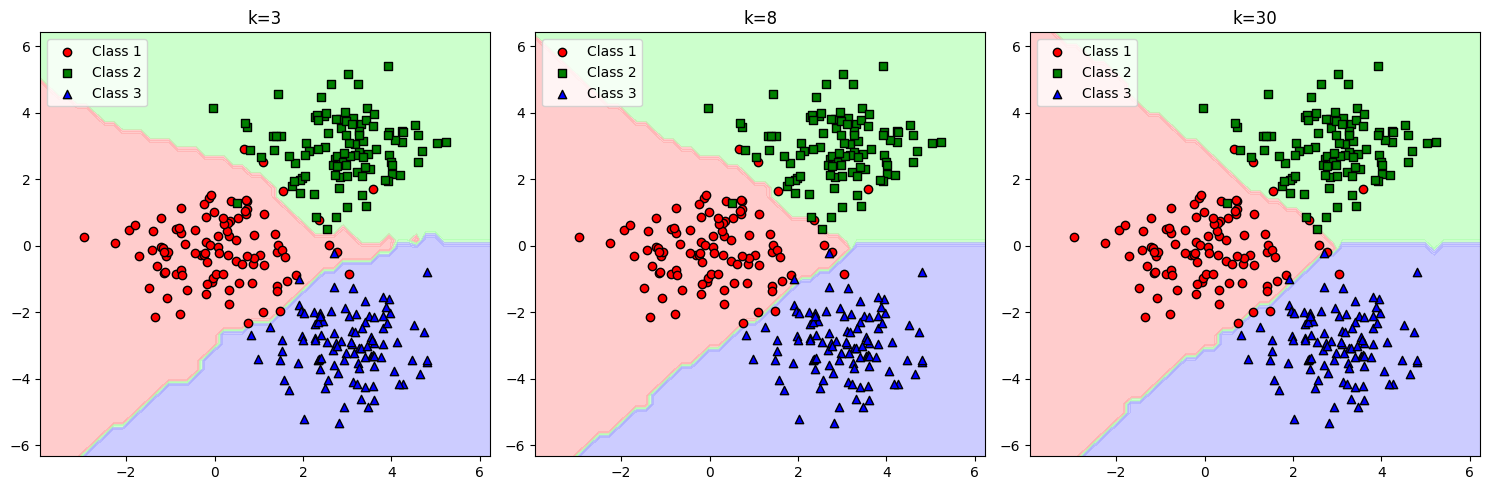

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap


# def euclidean_distance(x1,x2):
#     distance=np.sqrt(np.sum((x1-x2)**2))
#     return(distance)

# def k_nearest_neighbors(data,x,k):
#     distances=[]
#     for y in data:
#         dist=euclidean_distance(x,y)
#         distances.append((y,dist))
#     distances.sort(key=lambda y: y[1])
#     neighbors = [y[0] for y in distances[:k]]
#     further_distance=distances[k-1][1]
#     return neighbors,further_distance


# def estimate_pdf(data, x_values, k, label):
#     pdf_values = np.zeros(len(x_values))
#     filtered_data = data[data[:, 2] == label][:, :2]

#     for i, x in enumerate(x_values):
#         query_point = np.array([x])
#         distances = k_nearest_neighbors(filtered_data, query_point, k)[1]
#         v_x = np.pi * distances**2
#         pdf = k / (len(filtered_data) * v_x)
#         pdf_values[i] = pdf

#     return pdf_values.reshape(xx.shape)

# class_1 = data[data[:, 2] == 1][:, :2]
# class_2 = data[data[:, 2] == 2][:, :2]
# class_3 = data[data[:, 2] == 3][:, :2]


# x_1 = np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 80)
# x_2 = np.linspace(data[: ,1].min() - 1 ,data[:,1].max() +  1 ,80)
# # y_values=np.column_stack((x_1,x_2))
# xx, yy = np.meshgrid(x_1,x_2)
# x_values = np.c_[xx.ravel(), yy.ravel()]
k_values=[3,8,30]
fig, axes = plt.subplots(1,len(k_values), figsize=(15, 5))
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
for i,k in enumerate(k_values):
    ax=axes[i]
    ax.set_title(f"k={k}")


    # for i,label in enumerate([1, 2, 3]):
    pdf_1 = estimate_pdf(data, x_values, k, 1)
    pdf_2 = estimate_pdf(data, x_values, k, 2)
    pdf_3 = estimate_pdf(data, x_values, k, 3)

    decision_regions = np.argmax([pdf_1, pdf_2, pdf_3], axis=0)
    ax.contourf(xx, yy, decision_regions, cmap=cmap, alpha=0.6)

    ax.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1', marker='o', edgecolors='k')
    ax.scatter(class_2[:, 0], class_2[:, 1], c='green', label='Class 2', marker='s', edgecolors='k')
    ax.scatter(class_3[:, 0], class_3[:, 1], c='blue', label='Class 3', marker='^', edgecolors='k')

    ax.legend()

plt.tight_layout()
plt.show()







  - Είναι κατανοητό πως οι περιοχές απόφασης και ο αριθμός των γειτόνων $k$ έχουν μεγάλη εξάρτηση.Πιο αναλυτικά:<br/>

   - $k=3$ (μικρό): Λίγοι\κοντινοί γείτονες λαμβάνoνται υπόψην έτσι τόσο πιο "ακατέργαστη" είναι η απόφαση και πιο πολύπλοκες οι περιοχές απόφασης,αφού ακολουθούν πιστά την τοπική δομή των δεδομένων. Ο αλγόριθμος για είναι ευαίσθητος στον θόρυβο.

   - $k=8$ (μέτριο): Οι περιοχές απόφασης θα είναι λιγότερο ευαίσθητες στις τοπικές ανωμαλίες αλλά θα εξαρτώνται και λιγότερο από αυτές.Αυτός ο αριθμός γειτόνων χρησιμοποιείται σε περιπτώσεις που θέλουμε να αγνοήσουμε θορύβους ή κάποια τοπικά χαρακυηριστικά\ανωμαλίες.

   - $k=30$ (μεγάλο): Μακρινοί/αρκετοί γείτονες οδηγούν σε πιο σταθερή απόφαση και λιγότερο περιορισμένες περιοχές απόφασης.Οι περιοχές απόφασης είναι πιο ομαλές και λιγότερο ευαίσθητες σε τοπικές ανωμαλίες.Έτσι είναι πιο πιθανό να αντικατοπτρίζουν τη γενική δομή των δεδομένων.

* Ε.
---
<br/>

Μας ζητείται αρχικά να συγκρίνουμε τις δύο τεχνικές.<br/>

 ## **Parzen VS k-NN** <br/>

  
### Διαφορές:<br/>
  1. Parzen χρησιμοποιείται κυρίως για γραμμικά προβλήματα και  εκτίμηση πυκνότητας χωρίς να απαιτεί ιδιαίτερη γνώση για το πρόβλημα  ενώ ο k-nn είναι ένας απός αλγόριθμος  ρητά για ταξινόμηση.

  2. Ο k-nn ορίζει  τα όρια απόφασης, εναντιθέσει με τον parzen που δεν το κάνει γιατί  εκ φύσεως είναι αλγόριθμος υπολογισμού πυκνότητας.

  3. Ο parzen βασίζεται σε περιοχή εύρους ζώνης (bandwith), ενώ ο k-nn σε αριθμό γειτόνων(k).

  4. Η απόδοση του parzen είναι ευαίσθητη στην επιλογή παραθύρου,ενώ η απόδοση του k-nn ποικίλει ανάλογα με την επιλογή του k και της μετρικής απόστασης.

  5. Ο k-nn παρότι είναι απλός αλγόριθμος μπορεί να δυσκολεύεται σε μη συσχετιζόμενα χαρακτηριστικά ή χαρακτηριστικά με θόρυβο.Από την άλλη, ο parzen μπορεί να βρει δυσκολίες σε δοδομένα υψηλής διάστασης.

  6. Τα παράθυρα parzen παρέχουν ομαλές εκτιμήσεις,ενώ το όριο απόφασης του k-nn είναι αρκετά ευαίσθητο στην επιλογή του k.

  7. Για μεγάλα σύνολα δεδομένων ο k-nn γίνεται αρκέτα κοστοφόρος,αφού πρέπει να υπολογίσει αποστάσεις σε όλα τα σημεία εκπαίδευσης.Βέβαια υπάρχουν τεχνικές μείωσης του κόστους(greedy aproach).Ο parzen εξαρτάται από την επιλογή του εύρου ζώνης και τον αριθμό των διαστάσεων.

## **Γεωμετρικές τεχνικές** <br/>
  1. Είναι ανθεκτικές στο overfitting.Μπορεί να είναι λιγότερο επιρρεπείς σε σχέση με άλλα σύνθετα μοντέλα.
  2. Έχουν συχνά πολύ χαμηλό υπολογιστικό κόστος και μεγάλη απόδοση. Έτσι αυτό τους καθιστά κατάλληλους για μεγάλα σύνολα ή για εφαρμογές πραγματικού χρόνου.
  3. Διαχειρίζονται πολύ καλά τη μη γραμμικότητα.Για παράδειγμα το svm με τους κατάλληλους πυρήνες.
  4. Κάποια μοντέλα είναι ευαίσθητα στις ακραίες τιμές, επηρεάζοντας αρνητικά τα όρια απόφασης.
  5. Ευαισθησία στην επιλογή των παραμέτρων,όπως επιλογή πυρήνα,συντελεστές κόστους,βάρη,εποχές κτλπ.


# ΑΣΚΗΣΗ 2
---
---
- Μας ζητείται να γράψουμε κατάλληλό κώδικα ώστε να παράξουμε 150 τυχαία δείγματα από κάθε μια από τις κατηγορίες και να απεικονίσουμε τα δείγματα κατάλληλα ώστε να διακρίνονται οι κλάσεις.
- Για να υλοποιήσουμε το ζητούμενο θα χρησιμοποιήσουμε τη default συνάρτηση "np.random.multivariate_normal" με ορίσματα μέση τιμή,πίνακας συνδιασποράς και αριθμός δειγμάτων και θα τα πλοτάρουμε με τη βοήθεια της "plt.scatter".

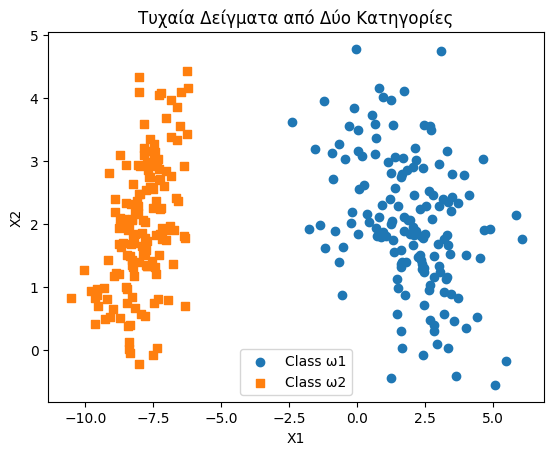

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# define parameters for two gaussian normal distributions

# for ω1
mean_1=np.array([2,2])
cov_1=np.array([[2,-0.5],[-0.5,1]])

samples_w1 = np.random.multivariate_normal(mean_1, cov_1, 150)


# for ω2
mean_2=np.array([-8,2])
cov_2=np.array([[1,0.5],[0.5,1]])

samples_w2 = np.random.multivariate_normal(mean_2, cov_2, 150)

plt.scatter(samples_w1[:, 0], samples_w1[:, 1], label='Class ω1', marker='o')
plt.scatter(samples_w2[:, 0], samples_w2[:, 1], label='Class ω2', marker='s')

plt.title('Τυχαία Δείγματα από Δύο Κατηγορίες')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

* A.
---
Σε αυτό το ερώτημα ζητείται να υλοποιήσουμε τον αλγόριθμο $batch \ perceptron$ και με αυτόν να υπολογίσουμε έναν γραμμικό ταξινομητή.Τέλος να απεικονίσουμε την επιφάνεια απόφασης που προέκυψε στο προηγούμενο γράφημα.<br/>

Έτσι ξεκινάμε με τον αλγόριθμο $bacth \ perceptron$:
  - Αρχικοποιώ τα βάρη $w=(w_0,w_1,w_2...w_n)=0 $ με το $w_0=1$(bias).

  - Δίνω ετικέτες $y=(y_1,y_2,...,y_n)$ στα χαρακτηριστικά ανάλογα με το ποια κλάση ανήκουν 0 ή 1.

  - Για την είσοδο $x=(x_1,x_2,...x_n),$ υπολόγισε το $z=x_0*w_0 + x_1*w_1 +...+x_n*w_n,$ με  $x_0=1$.

  - $output=f(z), \ \ f(z)=\begin{cases} 1 & \text{if } z≥0 \\ 0 & \text{if } z<0 \end{cases}$

  - Ανανέωσε τα βάρη με βάση τη σχέση : $w_i←w_i+a*(y-output)*x_i$


Η περιοχή απόφασης για έναν γραμμικό ταξινομητή ,όπως ο $batch \ perceptron$ υλοποιείται από μία εξίσωση υπερεπιπέδου. Η γενική εξίσωση για ένα υπερεπίπεδο στον $n$-d χώρο δίνεται από τη σχέση:<br/>
 - $w_0*x_0+w_1*x_1+...+x_n*w_n=0$, με $x_0=1$.

Στο δικό μας παράδειγμα έχουμε 2 χαρακτηριστικά άρα το επίπεδο θα είναι 2-d και εξίσωση θα είναι :<br/>
  - $\boxed{x_2= -\frac{w_0}{w_2} - \frac{w_1}{w_2}*x_1}$

Παρακάτω υλοποιώ τον κώδικα για το ερώτημα Α. και παρουσιάζω τις κλάσεις  αλλά και το υπερεπίπεδο σε κοινό γράφημα.Πιο αναλυτικά τα βήματα της υλοποίσησης είναι ίδια με τα θεωρητικά απλά προσθέτουμε στο διάνυσμα(np.array) το bias=1,αρχικοποιούμε τα βάρη να είναι ίσα με μηδέν(0).Τρέχουμε τον αλγόριθμο για 100 εποχές και το $a$ ή learning rate είναι 0.1.Έτσι αφού έχουμε υπολογίσει τα βάρη,ορίζουμε το διάστημα τιμών με βάση τα χαρακτηριστικά μας για το $x_1$, υπολογίζουμε το $x_2$ με βάση την παραπάνω σχέση και πλοτάρουμε.





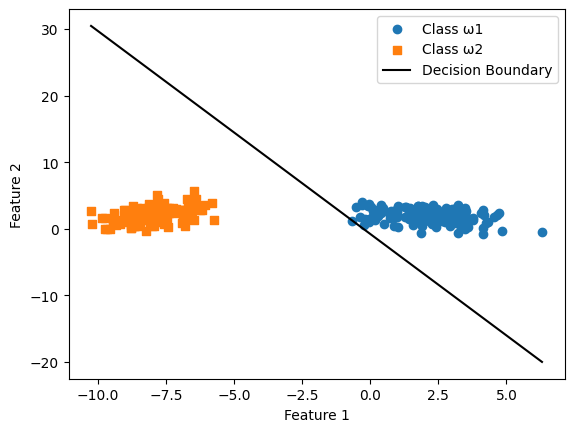

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# define parameters for two gaussian normal distributions

# for ω1
mean_1=np.array([2,2])
cov_1=np.array([[2,-0.5],[-0.5,1]])

class1_samples = np.random.multivariate_normal(mean_1, cov_1, 150)


# for ω2
mean_2=np.array([-8,2])
cov_2=np.array([[1,0.5],[0.5,1]])

class2_samples = np.random.multivariate_normal(mean_2, cov_2, 150)

plt.scatter(class1_samples[:, 0], class1_samples[:, 1], label='Class ω1', marker='o')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], label='Class ω2', marker='s')

X = np.vstack((class1_samples, class2_samples))
y = np.hstack((np.ones(150), -np.ones(150)))


def batch_perceptron(X, y, learning_rate=0.1, epochs=100):
    X = np.c_[np.ones(X.shape[0]), X] # we add bias=1
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        predictions = np.sign(np.dot(X, weights)) # calculate sign fnc
        errors = y - predictions
        weights += learning_rate * np.dot(errors, X)

    return weights


weights = batch_perceptron(X, y) # call batch_percepton fnc

minimum = np.min(np.minimum(class1_samples[:,0], class2_samples[:,0]))
maximum = np.max(np.maximum(class1_samples[:,0], class2_samples[:,0]))

x_decision_boundary = np.linspace(minimum,maximum, 100)
# x_decision_boundary = np.linspace(-12,6, 100)

# equation for hyperplane
y_decision_boundary=-(weights[0]/weights[2] + (weights[1]*x_decision_boundary/weights[2]))

plt.plot(x_decision_boundary, y_decision_boundary, label='Decision Boundary', color='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

 * B.
 ---
 Σε αυτό το ερώτημα μας ζητείται να χρησιμοποιήσουμε ένα γραμμικό SVM για να υπολογίσουμε ένα νέο γραμμικό ταξινομητή για τα ίδια δεδομένα με το Α.Πιο αναλυτικά λίγα λόγια για το SVM.

 - ## **SupportVectorMachine**
  1. Είναι σχεδιασμένο για δυαδική ταξινόμηση και για προβλήματα όπου πρέπει να βρεις το μοναδικό υπερεπίπεδο που χωρίζει τις δύο κλάσεις.Στο δικό μας πρόβλημα θα χρησιμοποιήσουμε γραμικό svm γιατί έχουμε δύο γραμμικά διαχωρίσημες κλάσεις.

  2. Το υπερεπίπεδο δίνεται από την εξίσωση $w^Τ*x+b=0$,$w=weights,x=input \ vector,b=w_0=bias \ term$.

  3. Η συνάρτηση απόφασης $f(x)=sign(w^T*x+b)$. Αν $f(x)>0→κλάση \ 1$. Αν $f(x)<0 →κλάση \ 2$.

  4. Η απόσταση από το υπερεπίπεδο και το κοντινότερο σημείο από κάθε κλάση ονιομάζεται margin.Το svm προσπαθεί να μεγιστοποιήσει το margin=$\frac{1}{||w||},||w||:$ευκλείδεια νόρμα των βαρών.

  5. Η εκπαίδευση ενός γραμμικού svm συνίσταται στην ελαχιστοποίηση του $\frac{||w||^2}{2}$, υπό την προυπόθεση ότι όλα τα δείγματα έχουν ταξινομηθεί σωστά.
  
  6. Τα διανύσματα υποστήριξης είναι τα σημεία δεδομένων που βρίσκονται πλησιέστερα στο υπερεπίπεδο και επηρεάζουν τη θέση του.Το SVM επικεντρώνεται στα διανύσματα υποστήριξης για τον καθορισμό του βέλτιστου υπερεπιπέδου.

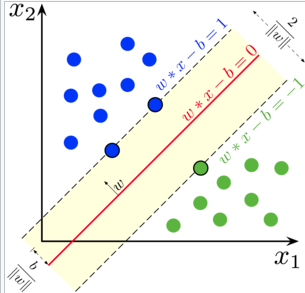

Example of Support Vector Machine


In [ ]:
# @title  Support Vector Machine
from IPython.display import Image, display

display(Image(filename=photo_path))
print(f"Example of Support Vector Machine")

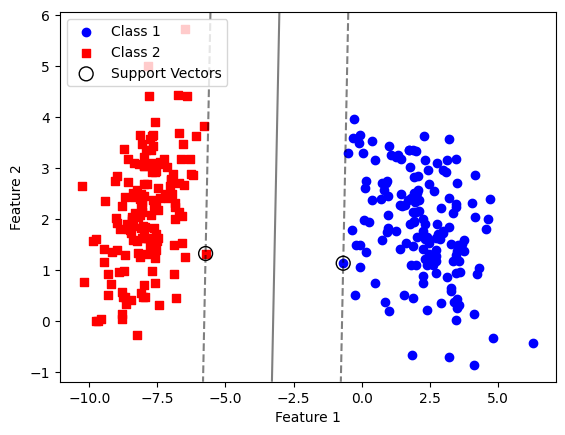

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

model = svm.SVC(kernel='linear')
model.fit(X, y)

# Scatter plot για τα δείγματα
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], marker='o', label='Class 1', color='blue')
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], marker='s', label='Class 2', color='red')

# Scatter plot για τα support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')

# Υπολογισμός και απεικόνιση του επιπέδου απόφασης
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(xy).reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc="upper left")
plt.show()


* Γ.
---
- Καταλαβαίνουμε πως η κατηγοριοποίηση με τον SVM είναι καλύτερη και πιο ακριβής απ' ότι με τον batch perceptron.Πιο αναλυτικά οι διαφορές οφείλονται στις διαφορετικές προσεγγίσεις και στόχους των δύο μεθόδων:<br/>
  - **Batch perceptron :**<br/>
     
     - Απλός γραμμικός ταξινομητής που εκαπιδεύεται  προσπαθώντας  να βρεί ένα γραμμικό όριο απόφασης για να  διαχωρίσει  τις κλάσεις.Τα βάρη ανανεώνονται μετά από κάθε επανάληψη,διορθώνοντας τα λάθη.Είναι ένας τύπος νευρωνικού δικτύου με 1 layer.
     - Ενημερώνει τα βάρη σε κάθε επανάληψη(εποχή) αφού εξετάσει όλα τα δείγματα εκπαίδευσης.Συγκλίνει σίγουρα εφόσον τα δεδομένα είναι γραμμικά διαχωρίσιμα.
     - Προσαρμόζει τα βάρη με βάση τις λανθασμένες ταξινομήσεις μέχρι να συγκλίνει ή να φτάσει ένα όριο επαναλήψεων-εποχών.
     - Ενδέχεται να δυσκολεύεται με μη γραμμικά διαχωρίσιμα δεδομένα.
    
  - **SVM:**<br/>
      -  Ισχυρός και ευέλικτος ταξινομητής που βασίζεται στη εύρεση ενός υπερεπιπέδου,μέσω των support vectors, με το μεγαλύτερο περιθώριο μεταξύ των κλάσεων.
      - Απαιτεί την επίλυση ενός προβλήματος βελτιστοποίησης με την εύρεση του βέλτιστου υπερεπιπέδου.
      - Οι SVM μπορούν να δημιουργήσουν μη γραμμικά όρια απόφασης χρησιμοποιώντας διαφορετικές συναρτήσεις πυρήνα, για να διαχειριστούν δεδομένα σε χώρους υψηλότερων διαστάσεων.



# AΣΚΗΣΗ 3
---
---
<br/>

Αρχικά για την υλοποίηση της άσκησης πρέπει να κατεβάσουμε manually  τη βιβλιοθήκη που περιέχει τα δεδομένα που θα χρησιμοποιήσουμε.Και έτσι η μεταβλητή $x$ περιέχει τα fearures, ενώ η $y$ τα targets.



In [ ]:
pip install ucimlrepo

In [ ]:
import ssl
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split


ssl._create_default_https_context = ssl._create_unverified_context

wine = fetch_ucirepo(id=109)
x = wine.data.features
y = wine.data.targets

* A.
---
Για το ερώτημα Α μας ζητείται να θεωρήσουμε ένα υποσύνολο των δεδομένων που περιέχει  τις ποικιλιές $c_2,c_3$ και μόνο τα πρώτα πέντε (5) συστατικά.Έυκολα μπορούμε να δημιουργήσουμε αυτό το υποσύνολο με τη βοήθεια του παρακάτω κώδικα.

In [ ]:
c2_c3_indices = np.where(np.logical_or(y == 2, y == 3))[0]
x = x.iloc[c2_c3_indices, :5]
y = y.iloc[c2_c3_indices]
y=np.array(y)

Έτσι μας ζητείται να χωρίσουμε το νέο υποσύνολο σε training,validation και test sets, με  αναλογία 50%, 25% και 25% αντίστοιχα, με τυχαία επιλογή δεδομένων και ίδια αναλογία μεταξύ των κλάσεων σε κάθε σύνολο.Για αυτή τη διαδικασία χρησιμοποιούμε την  default συνάρτηση train_test_split από τη βιβλιοθήκη sklearn.model_selection.Πιο αναλυτικά η συνάρτηση έχει αυτή τη μορφή:

 - x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.5, random_state=None, stratify=y) και
 παίρνει ως ορίσματα ή επιστρέφει :

  - x_train: feature matrix.
  - x_temp:  Εναπομείναντα χαρακτηριστικά αφού χωρίστηκε το σετ.
  - y_train: target variable.
  - y_temp:  Εναπομείναντες μεταβλητές αφού χωρίστηκε το σετ.
  - test_size: Τιμή που θα χωριστεί το σετ ανάμεσα σε test και validation
  - random_state: Ελέγχει την τυχαιότα του χωρισμού.Για άλλο νούμερο,το σύνολο θα χωριστεί διαφορετικά αλλά και πάλι τυχαία.
  - statify=f: Εξασφαλίζει ότι το σύνολο θα χωριστεί σε train,validation & test ώστε να υπάρχει η ίδια αναλογία μεταξύ των κλάσεων σε κάθε σύνολο.
  - Μια λεπτομέρεια είναι πως πρέπει να μετατρέψω τη μεταβλητή y σε np.array και μετά να την κάνω flatten(1-d array) γιατι η python "προτιμάει" τέτοιο όρισμα στην παραπάνω συνάρτηση.

Παρακάτω παρουσιάζεται ο κώδικας.Πρώτα ορίζω το 50% του συνόλου ως train set.Και στη συνέχει το εναπομέινων υποσύνολο πάλι σε 50% για το validation και το test.Άρα έχω train:50%, validation:25%, test:25%.

In [ ]:
from sklearn.model_selection import train_test_split

def my_seperate(number):

    x_train, x_temp, y_train, y_temp = train_test_split(x, y.ravel(), test_size=0.5, random_state=None, stratify=y)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp.ravel(), test_size=0.5, random_state=None, stratify=y_temp)

    return(x_train,y_train,x_val,y_val,x_test,y_test)



* B.
---
Εδώ ζητείται να εφαρμόσουμε έναν γραμμικό SVM για να εκπαιδεύσω ταξινομητή που να διαχωρίζει την κλάση $c_2$ από την $c_3$.Πρέπει να χρησιμοποιήσω το validation set ώστε να ρυθμίσω κατάλληλα την παράμετρο box constraint($C$).Έτσι για την καλύτερη τιμή να εφαρμόσω τον ταξινομητή που εκπαίδευσα στο test set.Η διαδικασία που ακολουθώ είναι η ακόλουθη:
 - Φτιάχνω μία λίστα με τιμές για το $C$ που είθισται να χρησιμοποιούνται.
 - Εκπαιδεύω το σύστημα μου για κάθε μία τιμή και το εφαρμόζω στα δεδομένα από το validation set.
 - Τελικά ελέγχω ποια τιμή του $C$ δίνει την καλύτερη ακρίβεια ,εκπαιδεύω το σύστημα μου για αυτή την τιμή και το εφαρμόζω τελικά στα δεδομένα του test set.
 - Αναφορικά με το SVM(άσκηση 2.) χρησιμοποιώ την defaut συνάρτηση SVC από τη βιβλιοθήκη "sklearn.svc".
 - Όλα τα παραπάνω εμπεριέχονται στη συνάρτηση "my_svm" η οποία παίρνει ως όρισμα kernel_fnc σε αυτό το ερώτημα kernel_fnc="linear".Έτσι η συνάρτηση καλεί την προηγούμενη "seperate" για να διαχωριστούν τα δεδομένα.Βρίσκει το κατάλληλο $C$ πάνω στα δεδομένα του validation set και αφού εκπαιδεύσει το σύστημα το ελέγχει στα δεδομένα του test_set και επιστρέφει το καλύτερο $C$,την ακρίβεια του validation αλλά και το σφάλμα ταξινόμησης.

In [ ]:
from sklearn.svm import SVC
import numpy as np

def svm_fnc(kernel_fnc):
  c_values = [0.001, 0.01, 0.1, 1, 10, 100]


  best_c = None
  best_val_accuracy = 0
  # seperate data
  x_train,y_train,x_val,y_val,x_test,y_test=my_seperate(None)



  for c in c_values:
    #  SVC for every c
      svm_model = SVC(kernel=kernel_fnc, C=c)

    # Train the model on the training set
      svm_model.fit(x_train, y_train)

    # Evaluate the model on the validation set
      val_accuracy = svm_model.score(x_val, y_val)

    # Check if this C value gives a better validation accuracy
      if val_accuracy > best_val_accuracy:
          best_val_accuracy = val_accuracy
          best_c = c

# Train model on training set
  final_svm_model = SVC(kernel=kernel_fnc, C=best_c)
  final_svm_model.fit(x_train, y_train)

# Evaluate the final model on the test set
  test_accuracy = final_svm_model.score(x_test, y_test)
  class_error=1-test_accuracy


  return(best_c,best_val_accuracy,class_error)


In [ ]:
best_c,best_val_accuracy,class_error=svm_fnc("linear")
print(f"Best C value: {best_c}")
print(f"Validation Accuracy: {best_val_accuracy}")
print(f"Test error: {class_error}")

Best C value: 0.1
Validation Accuracy: 0.8333333333333334
Test error: 0.09999999999999998


* Γ.
---
<br/>

- Μας ζητείται να υπολογίσουμε την ακρίβεια για 5 νέους τυχαιοποιημένους διαμερισμούς των δεδομένων και να υπολογίσουμε τη μέση τιμή και την τυπική απόκλιση του σφάλματος στο test set.
- Έτσι δημιουργούμε μία νέα συνάρτηση "calculate" με όρισμα πάλι kernel_fnc όπου καλέι 5 φορές την συνάρτηση "my_svm" και στη συνέχεια υπολογίζει τη μέση τιμή και την τυπική απόκλίση του σφάλματος στο test_set.


In [ ]:
import numpy as np
def calculate(kernel_fnc):
    num_splits=5
    classification_errors=[]
    for i in range(num_splits):
        error=svm_fnc(kernel_fnc)[2]
        classification_errors.append(error)

    mean_error=sum(classification_errors)/len(classification_errors)

    squared_diff = [(ele - mean_error)**2 for ele in classification_errors]
    variance=sum(squared_diff)/len(squared_diff)
    std_error=np.sqrt(variance)
    print(f"SVM for kernel function: {kernel_fnc}")
    print(f"Mean classification error: {mean_error:.3f}")
    print(f"Standard Deviation of Classification error: {std_error:.3f}\n")

calculate("linear")

SVM for kernel function: linear
Mean classification error: 0.147
Standard Deviation of Classification error: 0.075



* Δ.
---
<br/>

- Πρέπει μα επαναλάβουμε το ερώτημα Γ. δοκιμάζοντας νέες συνάρτήσεις πυρήνα.
- Θα δοκιμάσουμε για :
   - 1. $linear : K(x,y)=x^T⋅y $
   - 2. $rbf    : K(x,y)=exp(-γ||x-y||^2)$
   - 3. $poly   : K(x,y)=(x^T⋅y +c)^d  $
   - 4. $sigmoid: K(x,y)=tanh(ax^T⋅y +c)$
  

- H συνάρτηση για αυτό το ερώτημα είναι έτοιμη.


In [ ]:
kernels=["linear","rbf","poly","sigmoid"]

for kernel in kernels:
  calculate(kernel)

SVM for kernel function: linear
Mean classification error: 0.180
Standard Deviation of Classification error: 0.054

SVM for kernel function: rbf
Mean classification error: 0.213
Standard Deviation of Classification error: 0.072

SVM for kernel function: poly
Mean classification error: 0.140
Standard Deviation of Classification error: 0.033

SVM for kernel function: sigmoid
Mean classification error: 0.400
Standard Deviation of Classification error: 0.000



- Για τα παραπάνω δεδομένα η καλύτερη επιλογή συγκρίνοντας μέσο σφάλμα και τυπική απόκλιση είναι η συνάρτηση πυρήνα "poly".
- Η αμέσως επόμενη επιλογή θα ήταν ο γραμμικός ταξινομητής και η συνάρτηση πυρήνα "rbf".
- Επίσης αναφορικά με τον sigmoid καταλαβαίνουμε πως  έχει χαμηλή απόδοση και μηδενική τυπική απόκλιση.
- Πρέπει να είμαστε προσεκτικοί  με το μέσο σφάλμα και την τυπική απόκλιση για περιπτώσεις overfitting ή underfitting.
- Θεωρητικά οι επιλογές "linear" και "poly" είναι πολύ καλές γιατί χρησιμοποιούν στην ταξινόμηση τη διάσταση του προβλήματος. Ακόμα και η συνάρτηση πυρήνα "rbf" δίνει καλά αποτελέσματα γιατί χρησιμοποιεί τετραγωνικούς υπολογισμούς που τυχαίνει να ταυτίζονται με τη διάσταση του προβλήματος.

* E.
---
- Σε αυτό το ερώτημα πρέπει να χρησιμοποιήσουμε γραμμικό SVM και για τις 3 κλάσεις με την προσέγγιση ένας-εναντίον-ενός και καταμέτρηση ψήφων.Θέτοντας το $C=1$ και ακολουθώντας το πρωτόκολλο 5-fold cross validation πρέπει να βρούμε τη μέση τιμή του σφάλματος ταξινόμησης χρησιμοποιώντας  α) τα πρώτα 5 χαρακτηριστικά και β)  όλα τα χαρακτηριστικά.

- ## **OneVsOne approach**
 - Για $n$ κλάσεις έχω $n(n-1)/2$ ταξινομητές.
 - Κάθε ταξινομητής είναι εκπαιδευμένος να διακρίνει ανάμεσα από δύο(2) κλάσεις.
 - Έτσι για κάθε νέο δείγμα υπολογίζεται η εκτίμηση του κάθε ταξινομητή,δηλαδή με ποια κλάση ανήκει το δείγμα, και τελικά κερδίζει η κλάση με τους περισσότερους ψήφους.
 - Στο δικό μας πρόβλημα θα έχουμε 3 ταξινομητές $(c_1,c_2),(c_1,c_3),(c_2,c_3)$


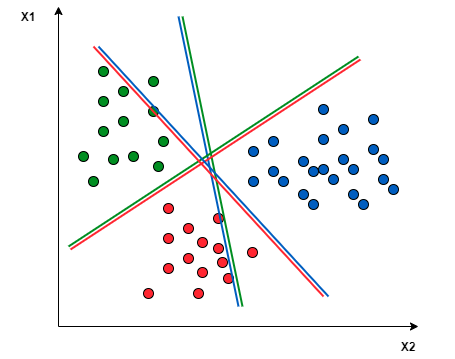

Example of Support Vector Machine


In [ ]:
# @title OneVsOne approach
from IPython.display import Image, display

display(Image(filename=onevsone))
print(f"Example of Support Vector Machine")

 - ## **k-fold Cross Validation**
 - Είναι μία τεχνική που προσπαθεί να βρει την καλύτερη απόδοση για ένα μοντέλο.Πιο αναλυτικά:
   - Χωρίζουμε το dataset σε $k$(εδώ 5) υποσύνολα ίδιου μήκους.
   - Σε κάθε επανάληψη χρησιμοποιούμε $k-1$ υποσύνολα για να εκπαιδεύσουμε το μοντέλο μας (training data) και το ένα υποσύνολο για να ελέγξουμε το μοντέλο  μας (testing or validation data).
   - Σε κάθε επανάληψη χρησιμοποιούμε διφορετικό υποσύνολο για το testing και άρα η διαδικασία θα ολοκληρωθεί σε $k$ επαναλήψεις,αφού έχουμε χωρίσει τα δεδομένα μας σε $k$ υποσύνολα.
   - Μετά από κάθε επανάληψη βρίσκουμε το σφάλμα και τέλος υπολογίζουμε το μέσο σφάλμα ταξινόμησης.
   - Είναι μία πολύ καλή τεχνική εκτίμησης της απόδοσης του μοντέλου , αφού μετριάζουμε το ρίσκο για underfitting ή overfitting.

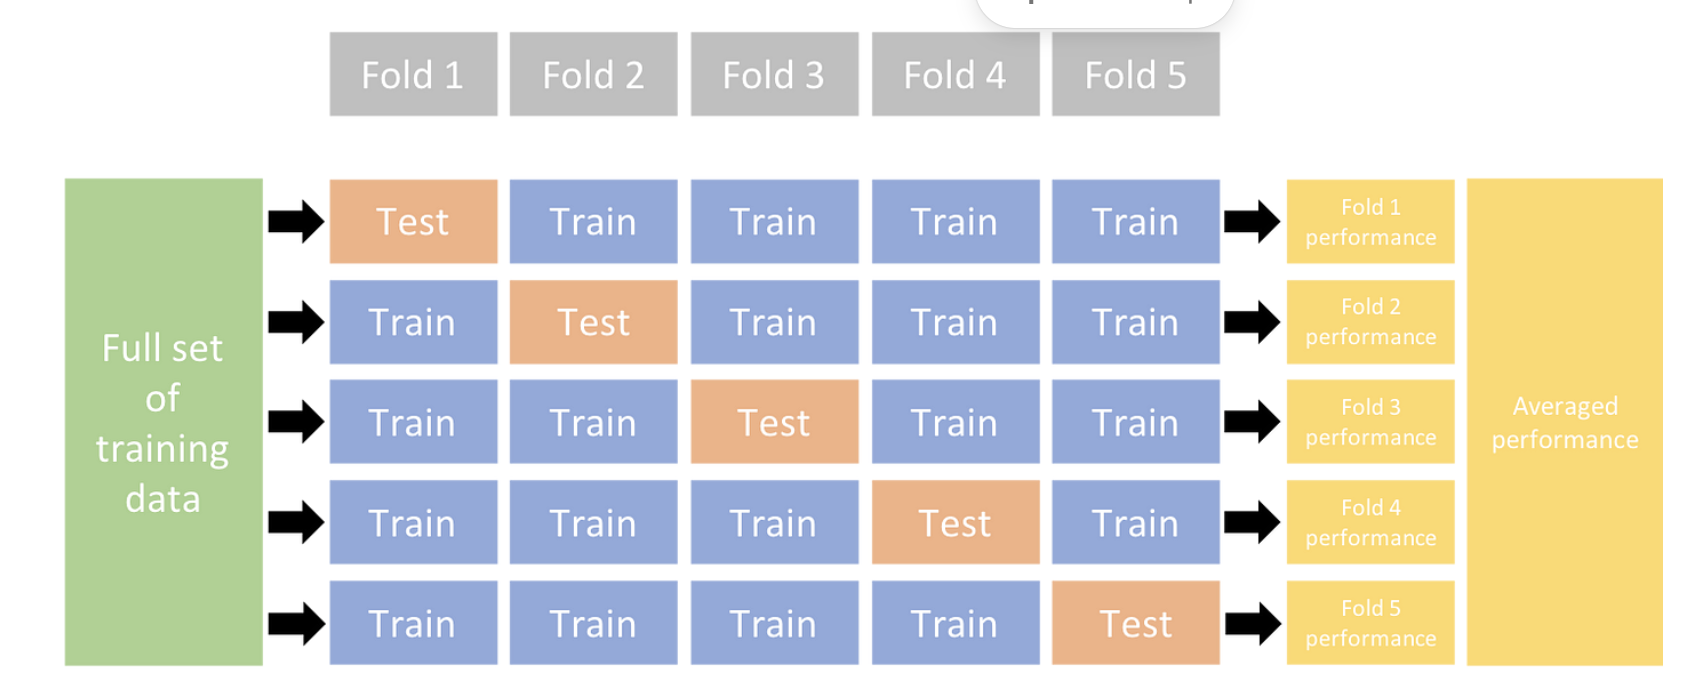

Example of k-fold Cross Validation


In [ ]:
# @title k-fold Cross Validation
from IPython.display import Image, display

display(Image(filename=k_fold))
print(f"Example of k-fold Cross Validation")

 - Πιο αναλυτικά ο κώδικας περιέχει:
   - default SVM(kernel="linear",C=1 decision_function_shape="ovo"),"ovo"=one vs one aproach.
   - cross_val_score(svm, X_selected, y, cv=5),cv= k for cross validation is 5.
 - Έτσι για το ερώτημα α) για τα 5 πρώτα συστατικά θα έχουμε τον παρακάτω κώδικα.

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix




wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

X_selected = X.iloc[:, :5]
y=np.ravel(y)

# create linear svm with c=1 and one vs one approach
svm = SVC(kernel='linear', C=1, decision_function_shape='ovo')

# calculate error with 5-fold cross validation
scores = cross_val_score(svm, X_selected, y, cv=5)
predicted=cross_val_predict(svm,X_selected,y,cv=5)
mean_error = 1 - scores.mean()
cm=confusion_matrix(y,predicted)

print(f"Mean classification error : {mean_error:.3f}")
print(f"Confusion matrix \n :{cm}")




Mean classification error : 0.185
Confusion matrix 
 :[[51  1  7]
 [ 3 58 10]
 [ 3  9 36]]


 - Αναφορικά με όλα τα συστατικά τώρα ο κώδικας θα είναι σχεδόν ο ίδιος το μόνο που αλλάζει είναι το X_selected

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix



# Φόρτωση του dataset
wine = fetch_ucirepo(id=109)
X = wine.data.features
y = wine.data.targets

# Επιλογή των πρώτων πέντε χαρακτηριστικών
X_selected = X
y=np.ravel(y)

# create linear svm with c=1 and one vs one approach
svm = SVC(kernel='linear', C=1, decision_function_shape='ovo')

# calculate error with 5-fold cross validation
scores = cross_val_score(svm, X_selected, y, cv=5)
predicted=cross_val_predict(svm,X_selected,y,cv=5)
mean_error = 1 - scores.mean()
cm=confusion_matrix(y,predicted)

print(f"Μέσο σφάλμα ταξινόμησης: {mean_error:.3f}")
print(f"Confusion matrix \n :{cm}")


Μέσο σφάλμα ταξινόμησης: 0.039
Confusion matrix 
 :[[58  1  0]
 [ 2 65  4]
 [ 0  0 48]]


 - O πίνακας σύγχυσης είναι ένας πίνακας που περιγράφει την απόδοση ενός μοντέλου επάνω σε ένα σετ χαρακτηριστικών (testing) γνωρίζοντας τις αληθείς τιμές των χαρακτηριστικών.Είναι χρήσιμο εργαλείο για να καταλάβουμε την απόδοση του μοντέλου μας.
 - Κάθε γραμμή και στήλη αντιπροσωπεύουν μια κλάση.
 - Τα διαγώνια στοιχεία αντιπροσωπεύουν τις σωστές ταξινομήσεις.
 - Ενώ τα υπόλοιπα στοιχεία  τις λανθασμένες.
 - Παρακάτω παρουσιάζεται ένα παράδειγμα για 3 κλάσεις A,B,C.

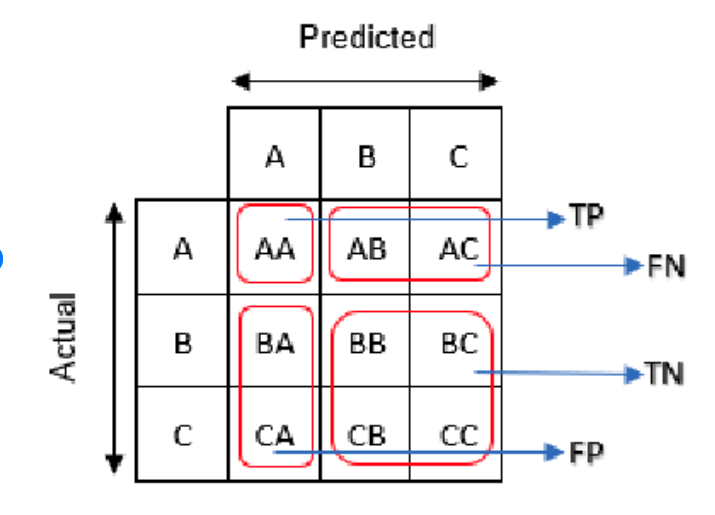

Example of Confusion matrix


In [ ]:
# @title  Confusion matrix
from IPython.display import Image, display

display(Image(filename=conf_matrix))
print(f"Example of Confusion matrix")

* α) Για τα πέντε πρώτα χαρακτηριστικά:

$$
\begin{bmatrix}
51 & 1 & 7 \\
3 & 58 & 10 \\
3 & 9 & 36 \\
\end{bmatrix}
$$

  - row 1 :
     - 51 στοιχεία ταξινομήθηκαν σωστά ως κλάση $c_1$
     - 1 στοιχείο της κλάσης $c_1$ ταξινομήθηκε λάθος ως στοιχείο της κλάσης $c_2$
     - 7 στοιχεία της κλάσης $c_1$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_3$

  - row 2 :
     - 58 στοιχεία ταξινομήθηκαν σωστά ως κλάση $c_2$
     - 3 στοιχεία της κλάσης $c_2$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_1$
     - 10 στοιχεία της κλάσης $c_2$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_3$

  - row 3 :
    - 36 στοιχεία ταξινομήθηκαν σωστά ως κλάση $c_3$
    - 3 στοιχεία της κλάσης $c_3$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_1$
    - 9 στοιχεία της κλάσης $c_3$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_2$

* b) Για όλα τα συστατικά έχουμε:

$$
\begin{bmatrix}
58 & 1 & 0 \\
2 & 65 & 4 \\
0 & 0 & 48 \\
\end{bmatrix}
$$

 - row 1 :
     - 58 στοιχεία ταξινομήθηκαν σωστά ως κλάση $c_1$
     - 1 στοιχείο της κλάσης $c_1$ ταξινομήθηκε λάθος ως στοιχείο της κλάσης $c_2$
     - 0 στοιχεία της κλάσης $c_1$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_3$

  - row 2 :
     - 65 στοιχεία ταξινομήθηκαν σωστά ως κλάση $c_2$
     - 2 στοιχεία της κλάσης $c_2$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_1$
     - 4 στοιχεία της κλάσης $c_2$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_3$

  - row 3 :
    - 48 στοιχεία ταξινομήθηκαν σωστά ως κλάση $c_3$
    - 0 στοιχεία της κλάσης $c_3$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_1$
    - 0 στοιχεία της κλάσης $c_3$ ταξινομήθηκαν λάθος ως στοιχεία της κλάσης $c_2$

- Για την περίπτωση:
   -  a) 19 στοιχεία των κλάσεων $c_2,c_3$ ταξινομήθηκαν εσφαλμένα σε μία από τις δύο κατηγορίες. Επίσης 10 στοιχεία των κλάσεων $c_1,c_3$ και 4 των $c_1,c_2 $ταξινομήθηκαν εσφαλμένα.

   -  b) 4 στοιχεία των κλάσεων $c_2,c_3$ ταξινομήθηκαν εσφαλμένα σε μία από τις δύο κατηγορίες. Επίσης κανένα στοιχείο των κλάσεων $c_1,c_3$ και 3 των $c_1,c_2 $ταξινομήθηκαν εσφαλμένα.

- Συμπερασματικά καταλαβαίνουμε πως οι κλάσεις $c_2$ και $c_3$ μοιάζουν πολύ με αρκετές λανθασμένες ταξινομήσεις ανάμεσά τους.Μπορούμε να πούμε πως και οι κλάσεις $c_1$ και $c_3$ παρουσιάζουν μια ομοιότητα.